# Quantum Cryptography
In this notebook we will implememnt and learn quantum Cryptography protocol for secure quantum communication.

In this we will learn:
- What is **Quantum Cryptography**
- Why classical cryptography is vulnarable?
- Core Idea of **Quantum Key distribution(QKD)**
- BB84 Protocol
- Implementing BB84 protocol using qiskit and AerSimulator


## Introduction to Quantum Cryptography
Quantum cryptography uses a **laws of quantum mechanic** to secure communication.
### Key Principle-
- **Measurement Disturebed the system**
- **No-cloning theorem** (quantum state cannot be copied)
- Any eavesdropping can be detected 

The Most Famous protocol is **BB84** proposed by **Bennett and Brassard(1984)**.

## BB84 Protocol
### Participants :
- **Alice** : Sender
- **Bob** : Receiver
- **eve** : Eavesdropper(optinal)
### Steps :
1. Alice Generate Random Bits and Random bases
2. Alice encodes bits into qubits
3. Bob measure using random bases
4. Alice and Bob compare bases(publicly)
5. Matching Bases - Secret key

## Import required Libraries

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np
from qiskit import transpile
from qiskit.visualization import plot_histogram

## Step 1 - Alice Generates Random Bits ans Bases
- creates random bit sequence(0 or 1)
- choose random bases (Z or X)

In [2]:
num_qubits=16
# Generate alice bits
alice_bits=np.random.randint(2,size=num_qubits)

# Generate Alice bases
alice_bases=np.random.randint(2,size=num_qubits)

print("\n Alice Bits =",alice_bits)
print("\n Alice bases=",alice_bases)


 Alice Bits = [0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0]

 Alice bases= [0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0]


## Step 2- Encode Bits into Qubits
- Apply X gate for bit=1
- Apply H gate for basis = X

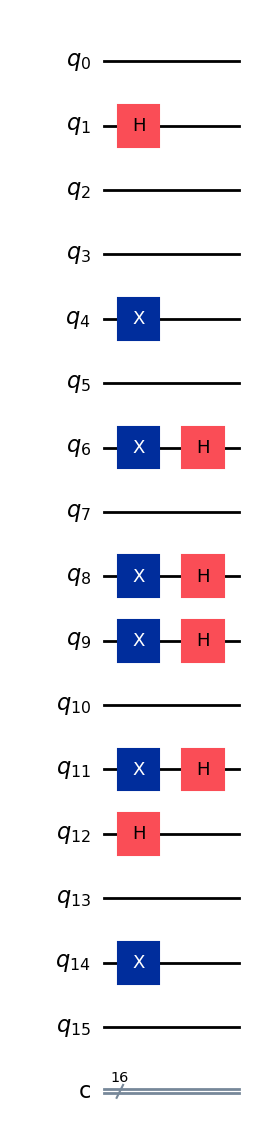

In [4]:
qc=QuantumCircuit(num_qubits,num_qubits)
for i in range(num_qubits):
    if alice_bits[i]==1:
        qc.x(i)
    if alice_bases[i]==1:
        qc.h(i)
qc.draw('mpl')

## Step 3 - Bob chooses random bases and Measures
- Bob selects rndom bases and applies H if needed
- Measure all Qubits

In [5]:
bob_bases=np.random.randint(2,size=num_qubits)
for i in range(num_qubits):
    if bob_bases[i]==1:
        qc.h(i)
qc.measure(range(num_qubits),range(num_qubits))
print("\n Bob bases=",bob_bases)


 Bob bases= [1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1]


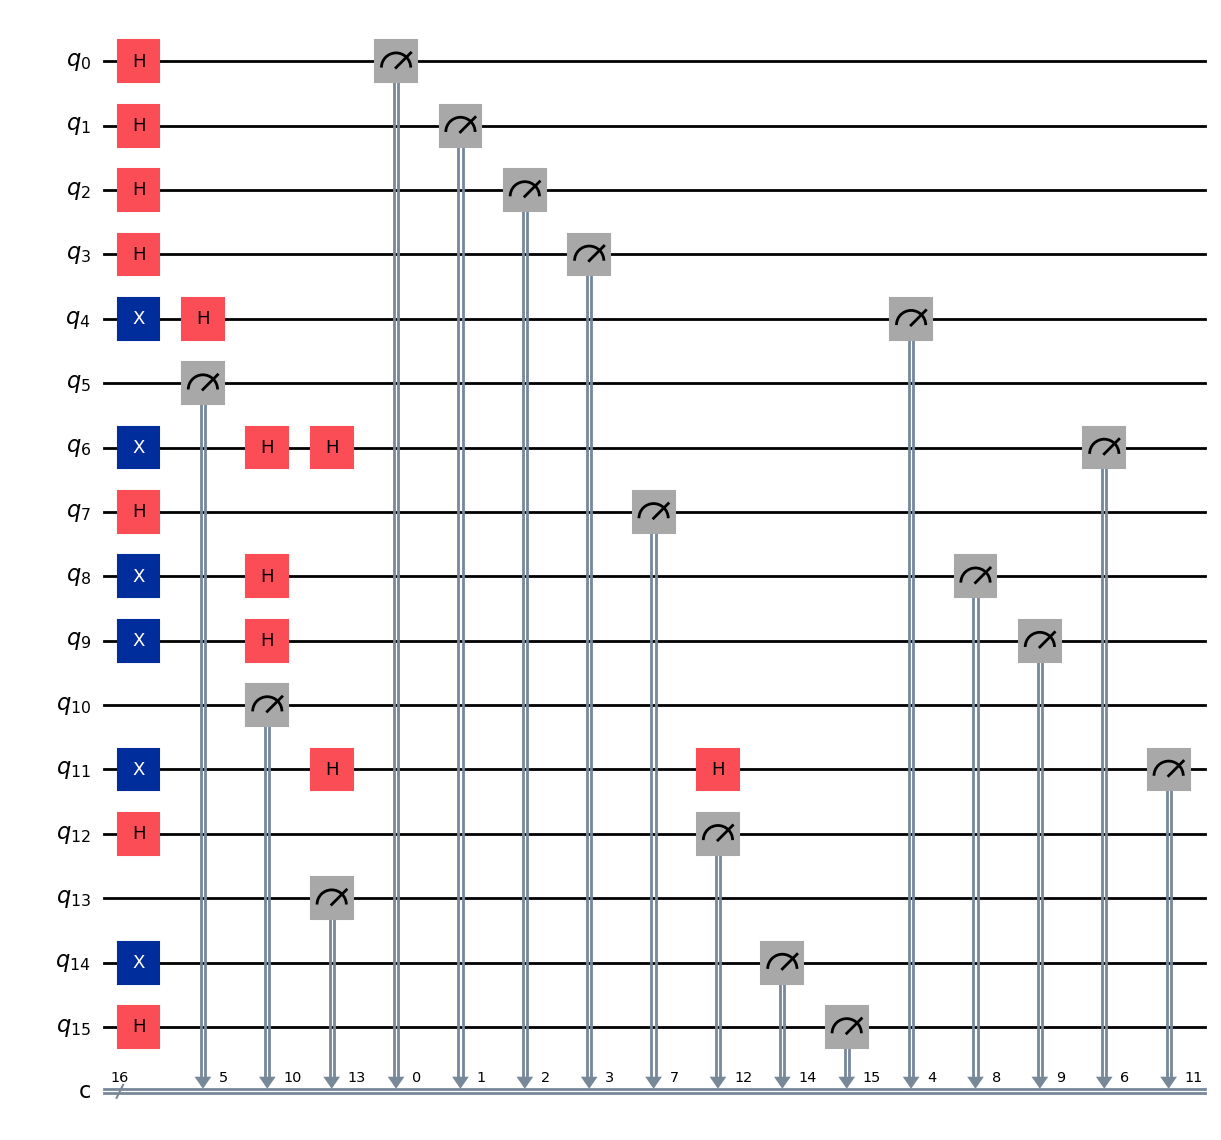

In [7]:
qc.draw('mpl')

## Step 4 - Execute Circuit Using AerSimulator
- Run circuit on AerSimulator
- Get Bob's measurement result

In [8]:
sim=AerSimulator()
compiled=transpile(qc,sim)
result=sim.run(compiled,shots=1).result()
counts=result.get_counts()

bob_results=list(counts.keys())[0][::-1]
bob_results=np.array(list(map(int,bob_results)))

print("\n Bob results=",bob_results)


 Bob results= [0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0]


## Step 5 - Key Sifting(compare bases)
- Compare Alice's and Bob's bases
- Keep bits where bases match --> shared secret Key

In [9]:
matching_indices=alice_bases== bob_bases

alice_key=alice_bits[matching_indices]
bob_key=bob_results[matching_indices]

print("\n Matching Position:",matching_indices)
print("\n Alice Key =",alice_key)
print("\n Bob Key= ",bob_key)


 Matching Position: [False False False False False  True  True False False False  True  True
 False  True  True False]

 Alice Key = [0 1 0 1 0 1]

 Bob Key=  [0 1 0 1 0 1]


## Visualize the result
 1. Plot Alice vs Bob bases
 2. Plot alice key vs bob key comparision distribution
 3. Plot key agreement accuracy

### 1.Alice vs Bob Bases (Matching Visualization)
This plot shows the randomly chosen measurement bases os Alice and bob .The green points indicate positions where both used th same basis.only these matching positions are kept ,forming the foundation of the secure key in BB84 protocol.

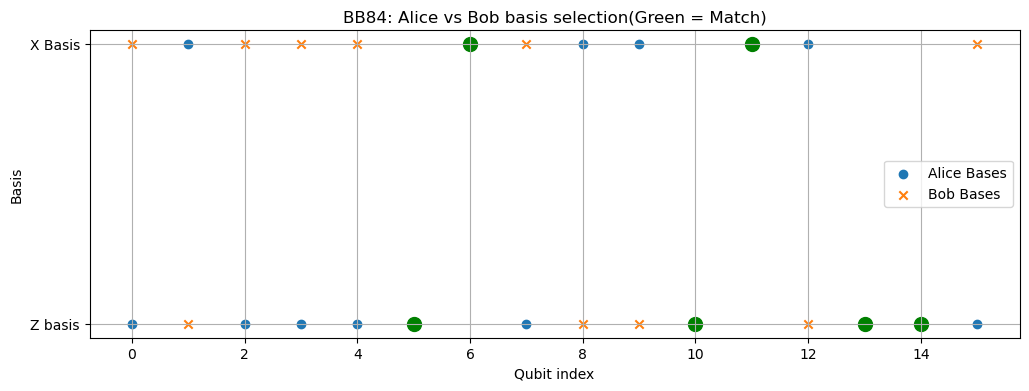

In [10]:
import matplotlib.pyplot as plt
x=np.arange(num_qubits)

plt.figure(figsize=(12,4))
plt.scatter(x,alice_bases,label="Alice Bases",marker="o")
plt.scatter(x,bob_bases,label="Bob Bases",marker="x")

for i in range(num_qubits):
    if alice_bases[i]==bob_bases[i]:
        plt.scatter(i,alice_bases[i],color='green',s=100)

plt.yticks([0,1],["Z basis","X Basis"])
plt.xlabel("Qubit index")
plt.ylabel("Basis")
plt.title("BB84: Alice vs Bob basis selection(Green = Match)")
plt.legend()
plt.grid(True)
plt.show()

### 2. Alice Key vs Bob Key Comparision
This bar plot compares the sifted keys of alice and bob after basis matching .The overlapping bit value confirms that both parties generates the same secrete key when no eavesdropping or noise present.

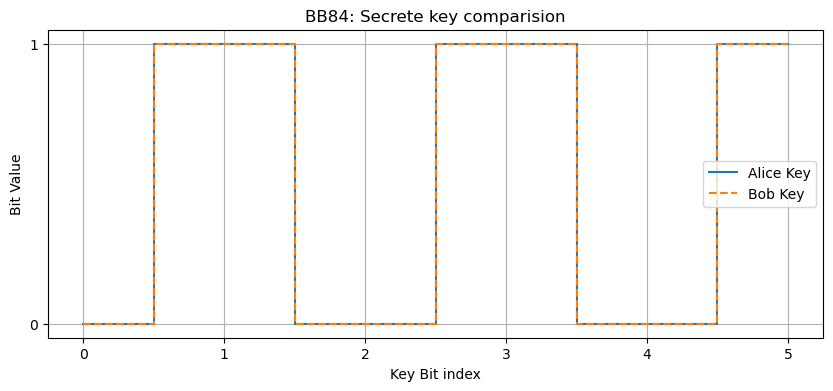

In [11]:
key_length=len(alice_key)
x_key=np.arange(key_length)

plt.figure(figsize=(10,4))
plt.step(x_key,alice_key,where='mid',label="Alice Key")
plt.step(x_key,bob_key,where='mid',linestyle="--",label="Bob Key")

plt.yticks([0,1])
plt.xlabel("Key Bit index")
plt.ylabel("Bit Value")
plt.title("BB84: Secrete key comparision")
plt.legend()
plt.grid(True)
plt.show()

### 3. Key Agreement Accuracy
This br plot shows the percentage of matching bits between alice and bob sifted keys.an accuracy close to 100 % indicate successful and secure key distribution using quantum cryptography.

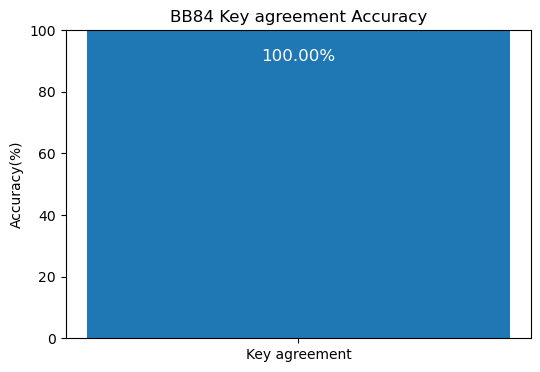

In [13]:
accuracy=np.sum(alice_key==bob_key)/len(alice_key)*100
plt.figure(figsize=(6,4))
plt.bar(["Key agreement"],[accuracy])
plt.ylim(0,100)
plt.ylabel("Accuracy(%)")
plt.title("BB84 Key agreement Accuracy")
plt.text(0,accuracy-10,f"{accuracy:.2f}%",ha="center",color="white",fontsize=12)
plt.show()

In this notebook we learned implementation of Qunatum cryptography throgh BB84 protocol for secure quantum communication. we got our key accuracy 100% seen in above plot it means out QKD is succesful. Quantum cryptography form the foundation for Post -quantum security in next generation communication network.

**Author:** *Shreya Palase*  

**Date Created:**  *20-Dec-2025*

**project:** Quantum-Computing-coding

**File:** day26_QuantumCrptography.ipynb

Thank you and Keep Learning!

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>